# Time series

In [3]:
from datetime import datetime

In [13]:
#Let's set a ranodm datetime
lesson_date = datetime(2021,1, 24, 10, 12, 1)

In [11]:
lesson_date.minute

12

In [14]:
#time difference

from datetime import timedelta

In [15]:
#timedeltas represent time as an amount rather than as a fixed position

In [16]:
offset = timedelta(days = 1, seconds = 20)

In [17]:
offset

datetime.timedelta(days=1, seconds=20)

In [18]:
offset.days

1

In [52]:
now = datetime.now()
print("What's the time now? :", now)

What's the time now? : 2021-01-24 13:24:53.031680


In [53]:
print('Future:', now + offset)

Future: 2021-01-25 13:25:13.031680


In [54]:
import pandas as pd

# Apple stock data

In [60]:
aapl = pd.read_csv('data/aapl.csv', parse_dates =True)

In [61]:
aapl.head()

,Date,Open,High,Low,Close,Volume
0,13-Jan-17,119.11,119.62,118.81,119.04,26111948
1,12-Jan-17,118.90,119.30,118.21,119.25,27086220
2,11-Jan-17,118.74,119.93,118.60,119.75,27588593
3,10-Jan-17,118.77,119.38,118.30,119.11,24462051
4,9-Jan-17,117.95,119.43,117.94,118.99,33561948


In [58]:
aapl.describe()

,Open,High,Low,Close,Volume
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,105.155100,106.060518,104.392550,105.292191,3.674495e+07
std,7.905047,7.876708,7.995679,7.963102,1.609059e+07
min,90.000000,91.670000,89.470000,90.340000,1.147592e+07
25%,97.355000,98.220000,96.690000,97.340000,2.665144e+07
50%,106.270000,107.270000,105.500000,106.100000,3.229234e+07
75%,111.450000,112.370000,110.700000,111.750000,4.137394e+07
max,119.110000,119.930000,118.810000,119.750000,1.322245e+08


#### Convert time to a datetime object

In [63]:
aapl['Date'] = pd.to_datetime(aapl.Date)

In [66]:
aapl

,Date,Open,High,Low,Close,Volume
0,2017-01-13,119.11,119.62,118.81,119.04,26111948
1,2017-01-12,118.90,119.30,118.21,119.25,27086220
2,2017-01-11,118.74,119.93,118.60,119.75,27588593
3,2017-01-10,118.77,119.38,118.30,119.11,24462051
4,2017-01-09,117.95,119.43,117.94,118.99,33561948
...,...,...,...,...,...,...
246,2016-01-25,101.52,101.53,99.21,99.44,51196375
247,2016-01-22,98.63,101.46,98.37,101.42,65562769
248,2016-01-21,97.06,97.88,94.94,96.30,52054521
249,2016-01-20,95.10,98.19,93.42,96.79,72008265


In [68]:
aapl1 = aapl.set_index('Date')

In [80]:
aapl['Date'].dt.day_name()

0         Friday
1       Thursday
2      Wednesday
3        Tuesday
4         Monday
         ...    
246       Monday
247       Friday
248     Thursday
249    Wednesday
250      Tuesday
Name: Date, Length: 251, dtype: object

In [82]:
import matplotlib.pyplot as plt
import numpy as np 

In [83]:
df = pd.read_csv('data/mapquest_google_trends.csv')

In [84]:
df

,WeekOf,mapquest
0,2004-01-04,53
1,2004-01-11,53
2,2004-01-18,54
3,2004-01-25,53
4,2004-02-01,52
...,...,...
635,2016-03-06,12
636,2016-03-13,12
637,2016-03-20,12
638,2016-03-27,12


In [85]:
df.columns = ['week_of', 'hits']

In [87]:
plt.rcParams['figure.figsize'] = (16,9)

Text(0, 0.5, 'Hits')

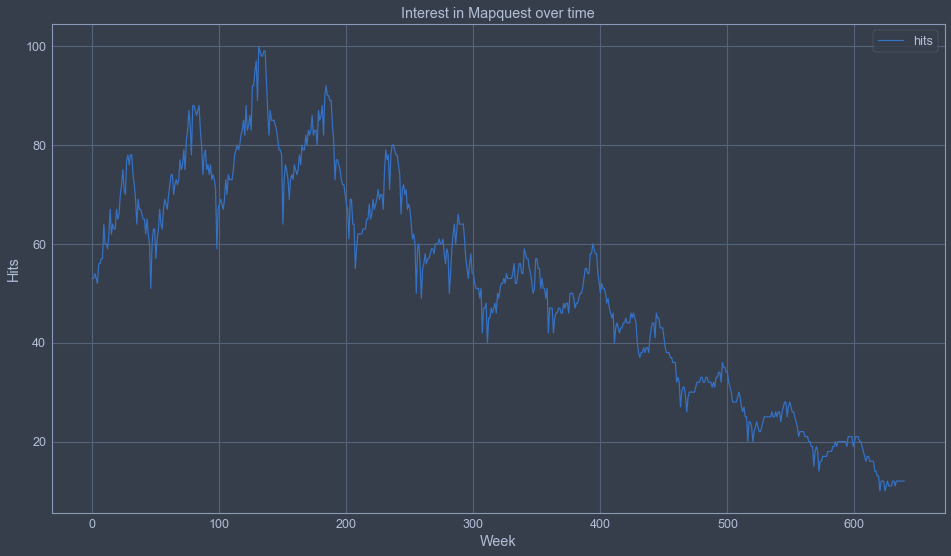

In [90]:
ax = df.plot(title = 'Interest in Mapquest over time')
ax.set_xlabel('Week')
ax.set_ylabel('Hits')

In [91]:
line_coef = np.polyfit(df.index, df['hits'],1)

In [92]:
polynomial = np.poly1d(line_coef)

In [93]:
polynomial

poly1d([-0.10841388, 86.58979622])

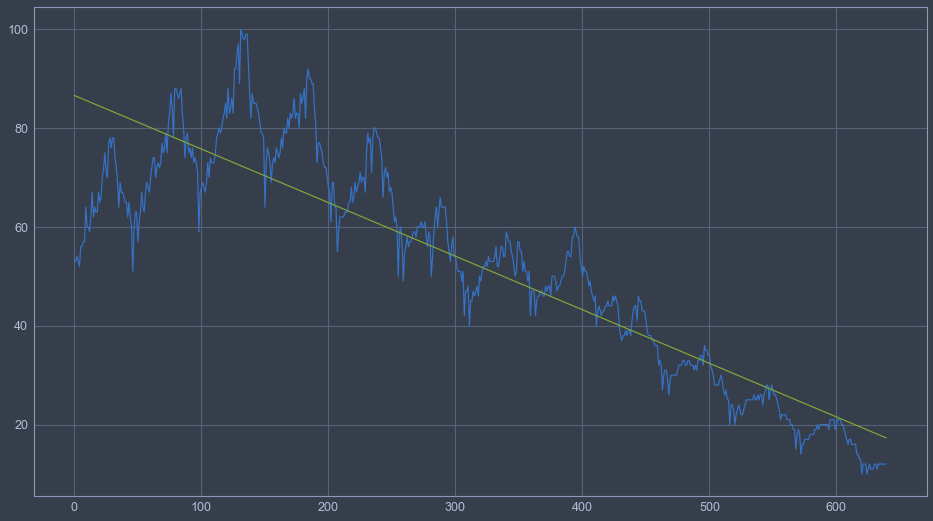

In [96]:
ax1 =plt.plot(df.index, df['hits'])
ax2 =plt.plot(df.index, polynomial(df.index))

In [97]:
line_coef = np.polyfit(df.index, df['hits'],2)

In [98]:
print(line_coef)

second_polynomial = np.poly1d(line_coef)

[-1.84964781e-04  9.77861827e-03  7.40219942e+01]


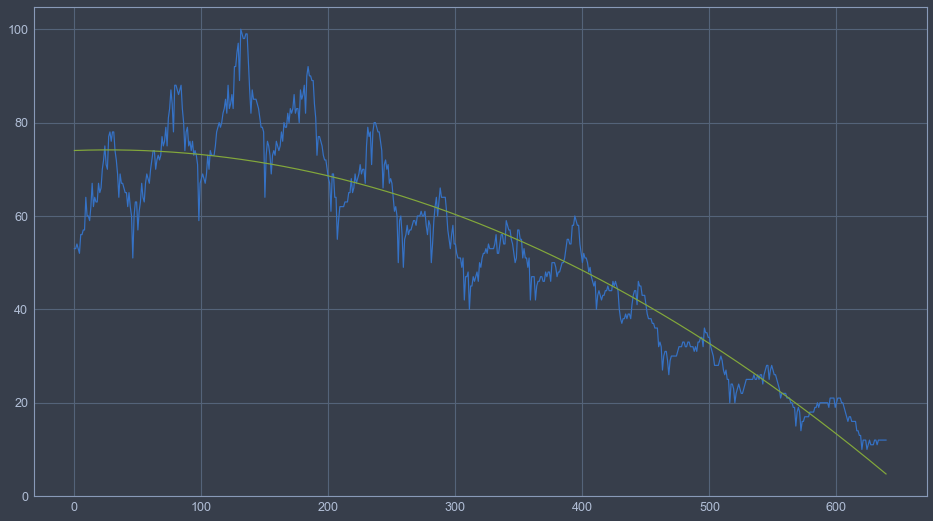

In [99]:
# Plot the time series.
plt.plot(df.index, df['hits'])
# Plot the least squares minimizing line.
plt.plot(df.index, second_polynomial(df.index))

In [104]:
data = pd.read_csv('data/rossmann.csv', low_memory =False, parse_dates = True, index_col = 'Date')

In [105]:
data

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1
2015-07-31,2,5,6064,625,1,1,0,1
2015-07-31,3,5,8314,821,1,1,0,1
2015-07-31,4,5,13995,1498,1,1,0,1
2015-07-31,5,5,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...
2013-01-01,1111,2,0,0,0,0,a,1
2013-01-01,1112,2,0,0,0,0,a,1
2013-01-01,1113,2,0,0,0,0,a,1


In [108]:
data['year'] = data.index.year
data['month'] = data.index.month


In [109]:
data['2015-05']

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,year,month
Date,,,,,,,,,,
2015-05-31,1,7,0,0,0,0,0,0,2015,5
2015-05-31,2,7,0,0,0,0,0,0,2015,5
2015-05-31,3,7,0,0,0,0,0,0,2015,5
2015-05-31,4,7,0,0,0,0,0,0,2015,5
2015-05-31,5,7,0,0,0,0,0,0,2015,5
...,...,...,...,...,...,...,...,...,...,...
2015-05-01,1111,5,0,0,0,1,a,0,2015,5
2015-05-01,1112,5,0,0,0,1,a,0,2015,5
2015-05-01,1113,5,0,0,0,1,a,0,2015,5


In [116]:
store1_data = data[data['Store']==1].copy()

In [120]:
import seaborn as sns

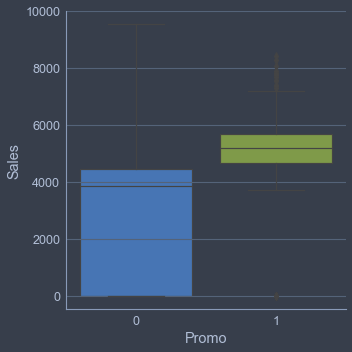

In [123]:
sns.catplot(x='Promo', y='Sales', kind='box', data = store1_data)

In [132]:
store1_data['day_name'] =store1_data.index.day_name()

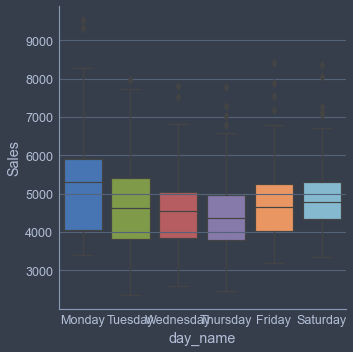

In [141]:
plt.rcParams['figure.figsize']= (16,9)
sns.catplot(
    x='day_name',
    y='Sales',
    data=store1_data[store1_data['Open']==1],
    kind='box',
    order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
)

In [130]:
store1_data.index.day_name()

Index(['Friday', 'Thursday', 'Wednesday', 'Tuesday', 'Monday', 'Sunday',
       'Saturday', 'Friday', 'Thursday', 'Wednesday',
       ...
       'Thursday', 'Wednesday', 'Tuesday', 'Monday', 'Sunday', 'Saturday',
       'Friday', 'Thursday', 'Wednesday', 'Tuesday'],
      dtype='object', name='Date', length=942)

In [134]:
plt.rcParams['figure.figsize']

[16.0, 9.0]

In [140]:
store1_data

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,year,month,day_name
Date,,,,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1,2015,7,Friday
2015-07-30,1,4,5020,546,1,1,0,1,2015,7,Thursday
2015-07-29,1,3,4782,523,1,1,0,1,2015,7,Wednesday
2015-07-28,1,2,5011,560,1,1,0,1,2015,7,Tuesday
2015-07-27,1,1,6102,612,1,1,0,1,2015,7,Monday
...,...,...,...,...,...,...,...,...,...,...,...
2013-01-05,1,6,4997,635,1,0,0,1,2013,1,Saturday
2013-01-04,1,5,4486,619,1,0,0,1,2013,1,Friday
2013-01-03,1,4,4327,578,1,0,0,1,2013,1,Thursday


In [142]:
store1_open_data = store1_data[store1_data['Open']==1]

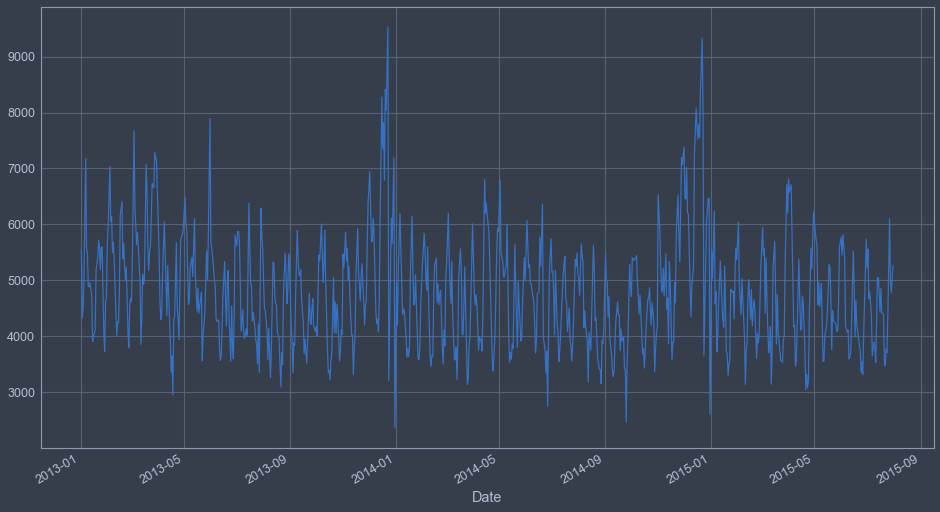

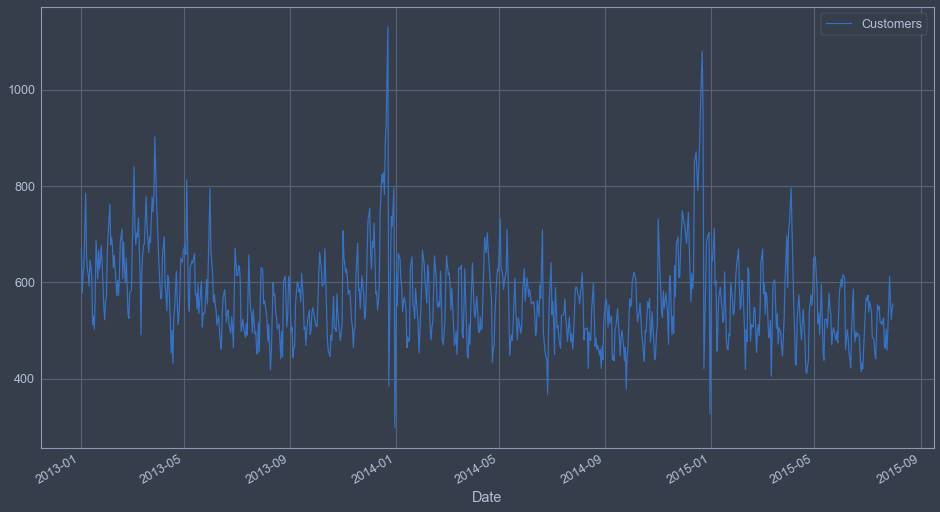

In [149]:

store1_open_data['Sales'].plot()
store1_open_data[['Customers']].plot()

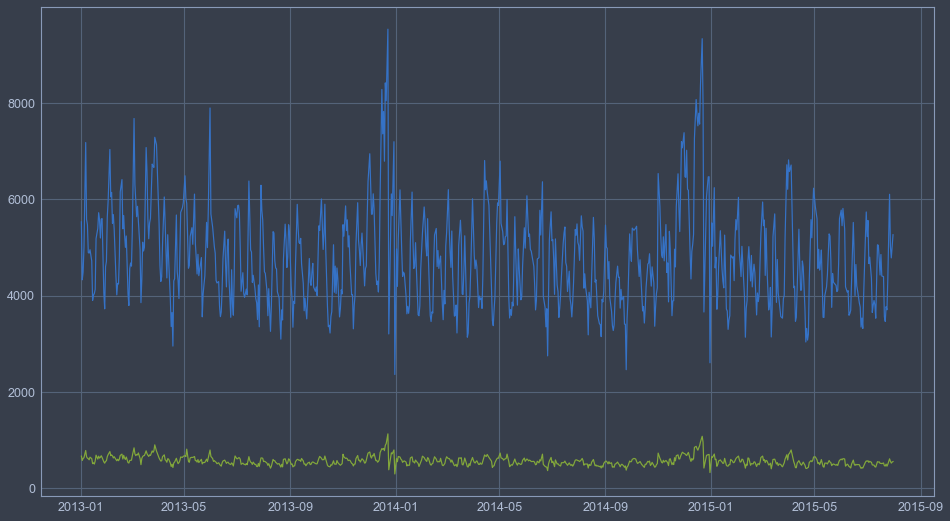

In [153]:
plt.plot(store1_open_data.index, 'Sales', data = store1_open_data)
plt.plot(store1_open_data.index, 'Customers', data = store1_open_data)

In [161]:
data[['Sales']].resample('A').mean()

,Sales
Date,
2013-12-31,5658.533675
2014-12-31,5833.290704
2015-12-31,5878.245380


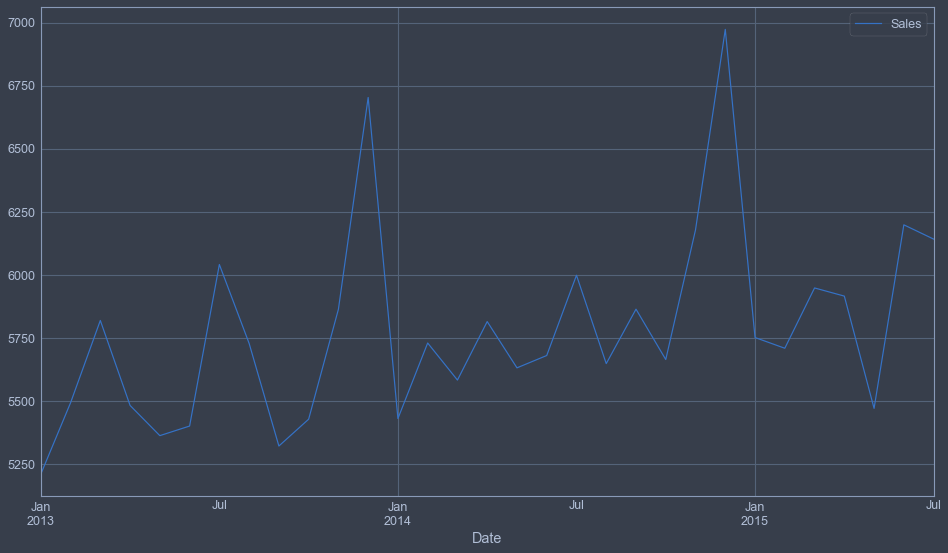

In [165]:
data[['Sales']].resample('M').mean().plot()

In [166]:
daily_store_sales = data[['Sales']].resample('D').sum()

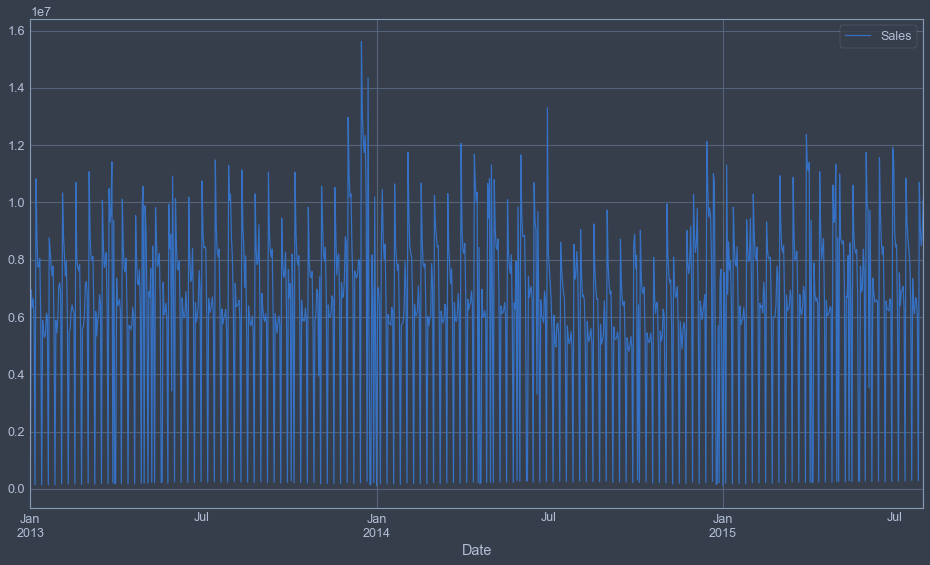

In [168]:
daily_store_sales.plot()

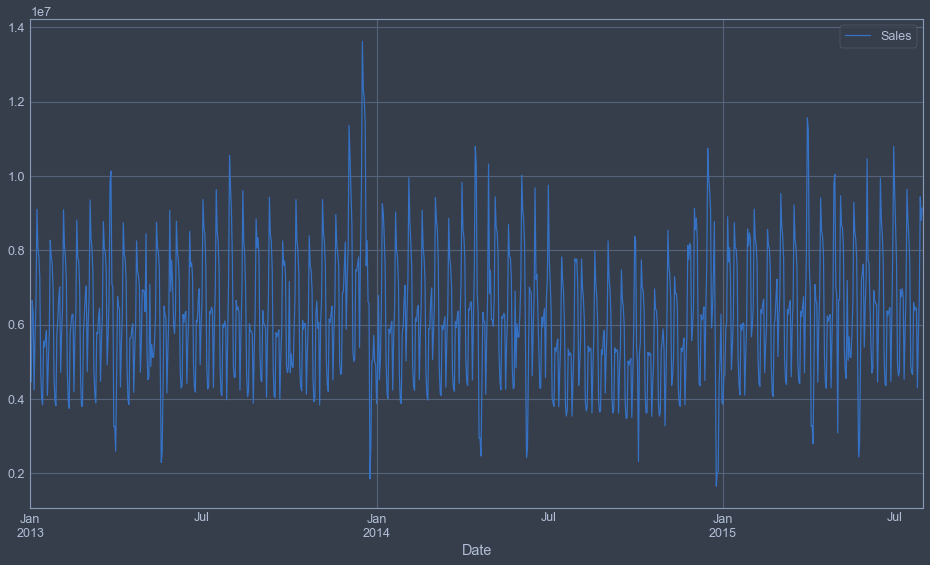

In [173]:
daily_store_sales.rolling( window=3, center=True).mean().plot()

In [187]:
daily_store_sales.rolling( window=3, center=False).mean()

,Sales
Date,
2013-01-01,NaN
2013-01-02,NaN
2013-01-03,4.464961e+06
2013-01-04,6.645534e+06
2013-01-05,6.312789e+06
...,...
2015-07-27,5.671608e+06
2015-07-28,6.702743e+06
2015-07-29,9.440776e+06


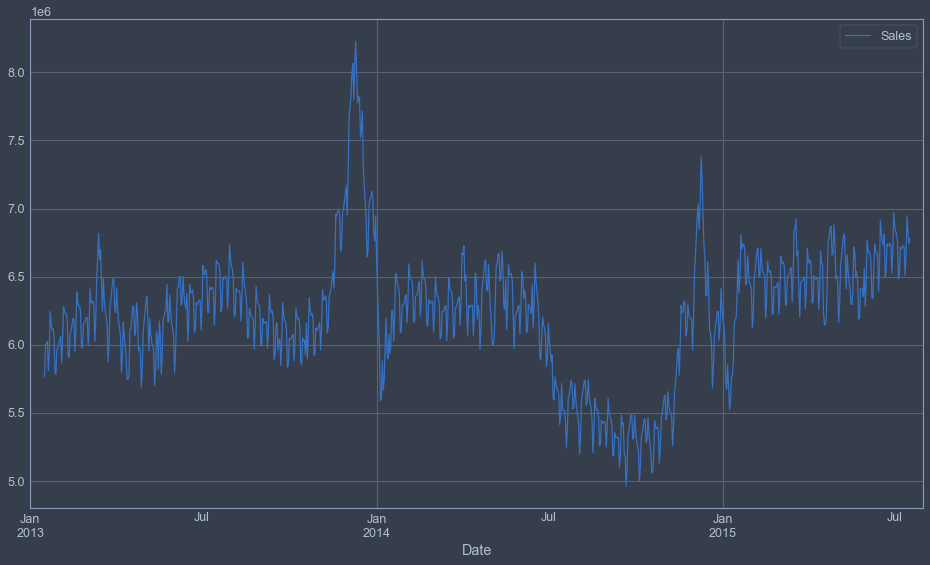

In [190]:
daily_store_sales.rolling(window=30, center=True).mean().plot();

In [193]:
rolling_mean = data.Sales.resample('Q').sum().rolling(window=2, center=True).mean()

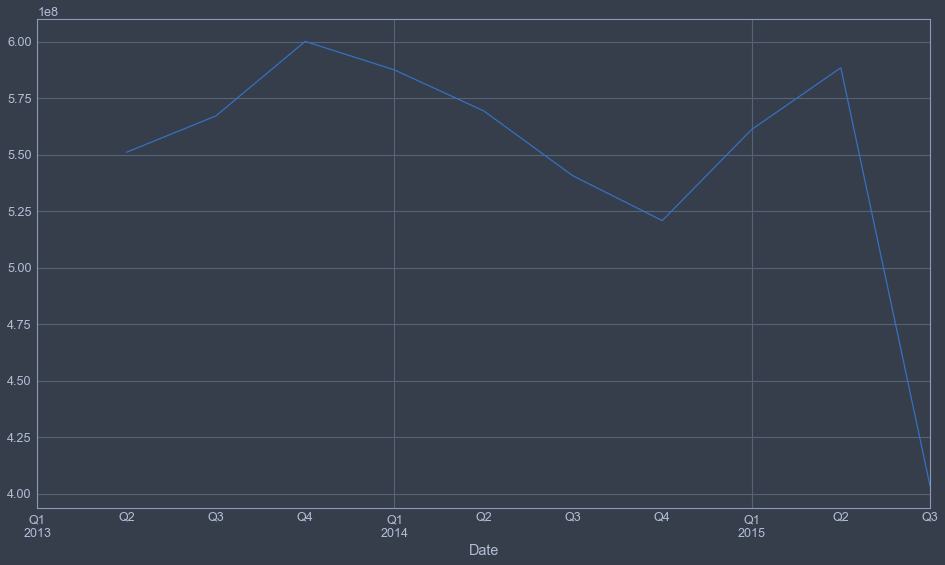

In [194]:
rolling_mean.plot()

In [195]:
unemp = pd.read_csv('data/unemployment.csv')

In [196]:
unemp

,Quarter,Seasonally adjusted quarterly U.S. unemployment rates from 1948 to 1993
0,1948Q1,3.733%
1,1948Q2,3.667%
2,1948Q3,3.767%
3,1948Q4,3.833%
4,1949Q1,4.667%
...,...,...
170,1990Q3,5.6%
171,1990Q4,5.9%
172,1991Q1,6.5%
173,1991Q2,6.833%


In [197]:
unemp.columns=['year_quarter','unemployment_rate']

In [220]:
unemp.dropna(inplace=True)

In [206]:
unemp.unemployment = unemp.unemployment_rate.str.replace('%','')

In [212]:
unemp['unemployment_rate'] = unemp.unemployment.astype(float)

In [215]:
unemp.drop(columns=('unemployment'), inplace=True)

In [224]:
unemp['date'] = pd.to_datetime(unemp.year_quarter).dt.to_period('Q')

In [226]:
unemp.set_index('date', inplace=True)

In [228]:
unemp.drop(columns=('year_quarter'), inplace=True)

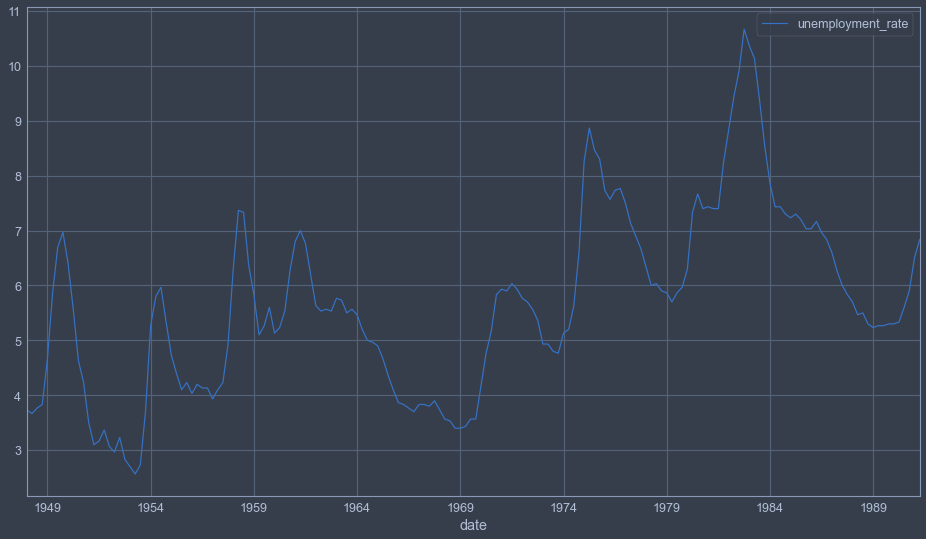

In [229]:
unemp.plot()

### 3) Calculate the rolling mean of years with `window=3 `, without centering, and plot both the unemployment rates and the rolling mean data.

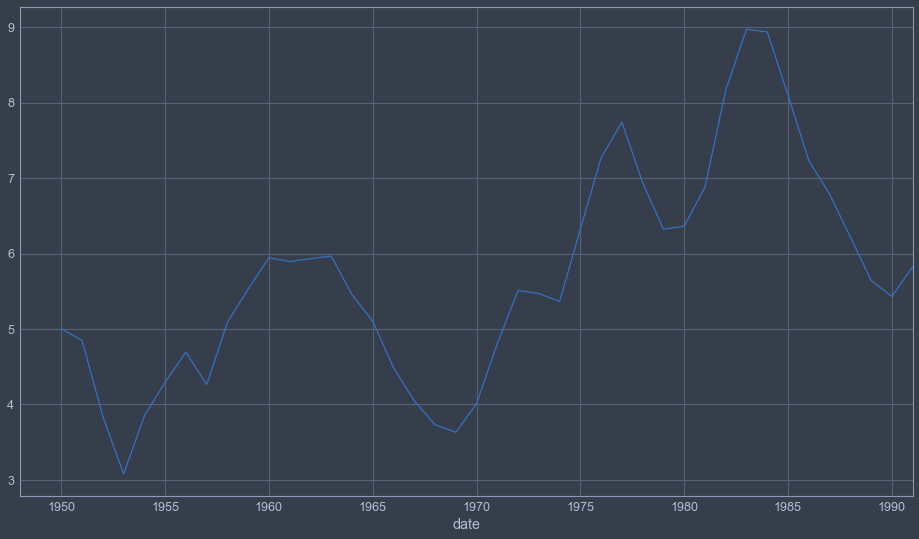

In [235]:
unemp.unemployment_rate.resample('A').mean().rolling(window=3).mean().plot()

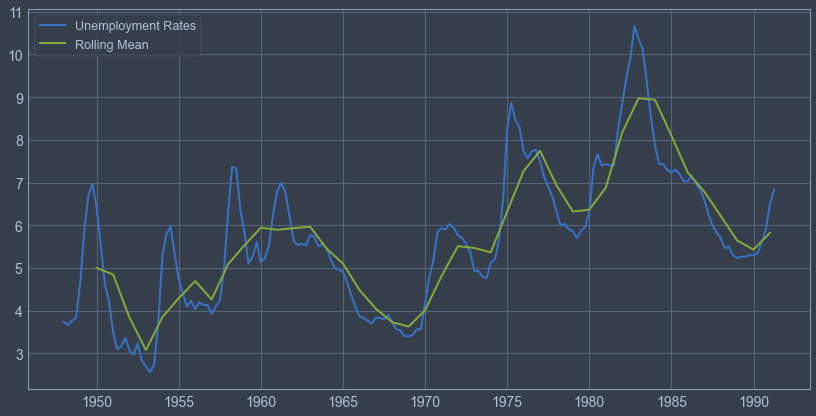

In [236]:
yearly = unemp['unemployment_rate'].resample('A').mean().rolling(window=3, center=False).mean()
# Extract the dates from the index as timestamps.
date_ticks_orig = unemp.index.to_timestamp()
date_ticks_roll = yearly.index.to_timestamp()

plt.figure(figsize=(14,7))

plt.plot(date_ticks_orig, unemp.unemployment_rate.values,lw=2)
plt.plot(date_ticks_roll, yearly.values, lw=2)
plt.legend(['Unemployment Rates','Rolling Mean'])
plt.tick_params(labelsize=14)